In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [14]:
# LOAD DATA
INPUT_DIR  = '../../../input/m5-forecasting-accuracy/'
LOG_NAME = '06_16_23_56_45'
data = pd.read_csv(INPUT_DIR + "sales_train_evaluation.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [15]:
predicted.shape

(1, 9, 28)

In [16]:
predicted

array([[[0.3922612 , 0.33388382, 0.28137505, 0.34704733, 0.65071213,
         0.8251568 , 0.9494345 , 0.49845898, 0.4796527 , 0.4775221 ,
         0.44120577, 0.578448  , 0.94067436, 0.8785688 , 0.58150357,
         0.470586  , 0.3566754 , 0.4345869 , 0.5396901 , 0.7076828 ,
         0.8192178 , 0.4457045 , 0.43343952, 0.3723431 , 0.35738447,
         0.49867365, 0.73673344, 0.74599123],
        [0.37754887, 0.34977365, 0.28537494, 0.34388465, 0.6344648 ,
         0.84836406, 0.9329937 , 0.49259514, 0.4796772 , 0.4660333 ,
         0.4369524 , 0.5759077 , 0.9250616 , 0.8636731 , 0.5451754 ,
         0.4743237 , 0.35132894, 0.42394203, 0.5350641 , 0.7192776 ,
         0.8141879 , 0.43432397, 0.42887607, 0.38371742, 0.36075172,
         0.49121562, 0.7303835 , 0.74857676],
        [0.38022357, 0.3181346 , 0.2919229 , 0.35128763, 0.64215255,
         0.8533725 , 0.93661344, 0.5154427 , 0.48552346, 0.46850288,
         0.45544067, 0.57556796, 0.9280527 , 0.856915  , 0.55426604,
         0.

In [17]:
# InverseするためのScalerを作る
data = data.drop('d_1792',axis=1)
use_days = json_load['use_days']
train_x = np.array(data.iloc[:, -1 * (28*2 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [18]:
# 予測値をInverse Transform
for i in range(9):
    predicted[:,i] = mm.inverse_transform(predicted[:,i])

In [19]:
days = 100
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

In [20]:
pred_array = np.zeros([1,9,100])

In [21]:
pred_array[0,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
for i in range(9):
    pred_array[0,i] = np.concatenate([sells.reshape(1,-1),predicted[:,i]],axis=1)
    print(pred_array)
#     predicted[:,i] = np.concatenate([sells.reshape(1,-1),predicted[:,i]],axis=1)

[[[53715.         48337.         46152.         37702.
   36545.         36436.         40392.         50857.
   52081.         37328.         33981.         34068.
   34615.         37649.         47887.         50915.
   37259.         36536.         38458.         41459.
   39325.         52322.         57218.         40562.
   37727.         37032.         38267.         40887.
   52711.         51421.         42035.         40117.
   36606.         35009.         39652.         46181.
   47825.         37360.         35475.         34786.
   34003.         45611.         53863.         46360.
   36041.         33857.         32359.         34681.
   45536.         52672.         56425.         40418.
   39683.         39134.         38116.         43220.
   56340.         53856.         42427.         39069.
   35193.         37529.         41789.         48362.
   51640.         38059.         37570.         35343.
   35033.         40517.         48962.         49795.
   36403.8

In [23]:
pred_array[0][0].shape

(100,)

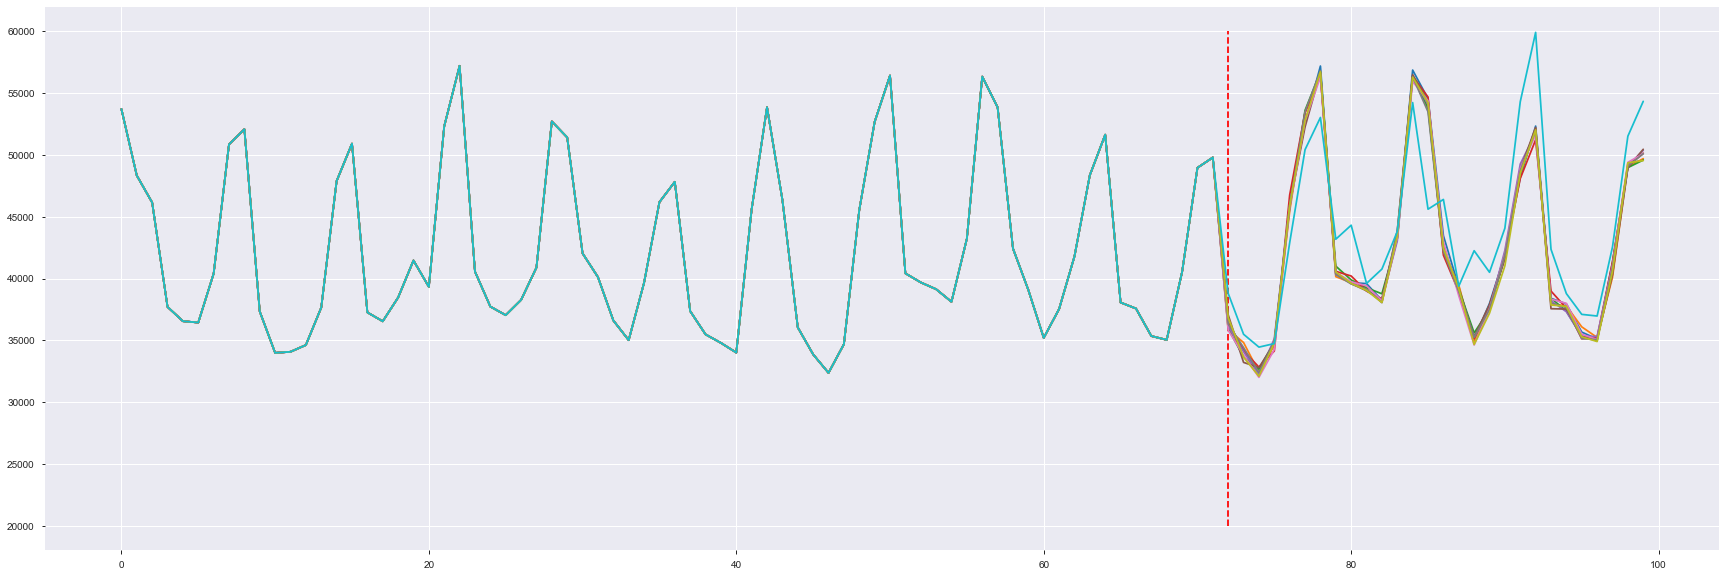

In [24]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
for i in range(9):
    plt.plot(pred_array[0][i])
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
plt.vlines(days-28, 20000, 60000, "red", linestyles='dashed')